In [66]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks
import os
import shutil
import gpt
from PIL import Image
import cv2


In [67]:
# IMAGE_PATH = "./Sentence.jpg"

# #Open Image
# image = image = Image.open(IMAGE_PATH)

# #Convert image to numpy array
# #Creates 3d array; Array of rows of pixels (and their rgb values)
# img_arr = np.array(image, dtype=np.uint32)
# original_img_arr = np.array(image, dtype=np.uint8)

In [68]:
# Read image
IMAGE_PATH = "./davidNotes.jpg"

image = Image.open(IMAGE_PATH).convert('RGB')

# Convert PIL Image to OpenCV format (numpy array)
img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise before thresholding
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Instead of adaptive threshold, use regular threshold with OTSU
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply slight median blur to remove remaining speckles
denoised = cv2.medianBlur(thresh, 3)

# Optional: If still too spotty, uncomment this line to apply additional smoothing
# denoised = cv2.GaussianBlur(denoised, (3, 3), 0)

# Convert back to 3-channel (but still grayscale)
denoised_3channel = cv2.cvtColor(denoised, cv2.COLOR_GRAY2BGR)
denoised_rgb = cv2.cvtColor(denoised_3channel, cv2.COLOR_BGR2RGB)

# Convert to PIL Image and then to numpy array
processed_pil = Image.fromarray(denoised_rgb)
img_arr = np.array(processed_pil, dtype=np.uint32)
original_img_arr = np.array(processed_pil, dtype=np.uint8)

# processed_pil.show()

Make each row the avg color in black and white

In [69]:
for row in img_arr:
    R = 0
    G = 0
    B = 0
    for pixel in row:
        R = R + pixel[0]
        G = G + pixel[1]
        B = B + pixel[2]
    
    #Set every pixel to its average r g and b value
    avg_R = R/len(row)
    avg_G = G/len(row)
    avg_B = B/len(row)
    
    avg = (avg_R+avg_B+avg_G)/3
    
    for pixel in row:
        pixel[0] = avg
        pixel[1] = avg
        pixel[2] = avg

Convert back to image

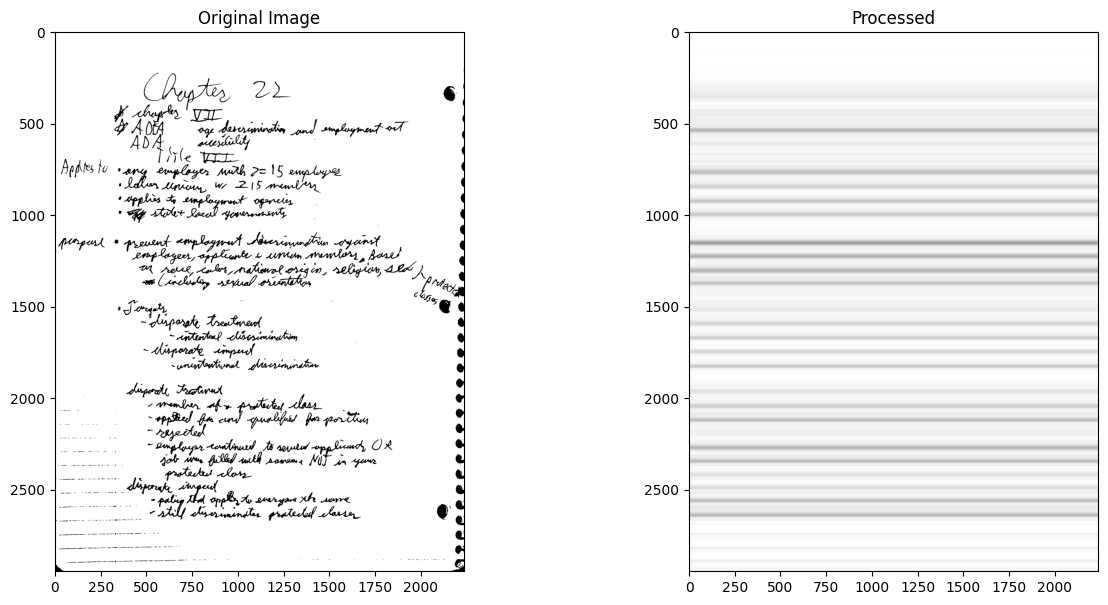

In [70]:
# Convert the processed array back to uint8 for pillow compatibility
formatted_img_arr = np.clip(img_arr, 0, 255).astype(np.uint8)

result_img = Image.fromarray(formatted_img_arr)

plt.figure(figsize=(15, 7))  # Adjust figure size as needed

#Show Images
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.imshow(np.array(processed_pil))
#plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)  # (rows, columns, index)
plt.imshow(np.array(result_img))
#plt.axis('off')
plt.title("Processed")

plt.show()

Notice How you can see the line breaks. This might be useful when breaking up pages into chunks to feed into the AI

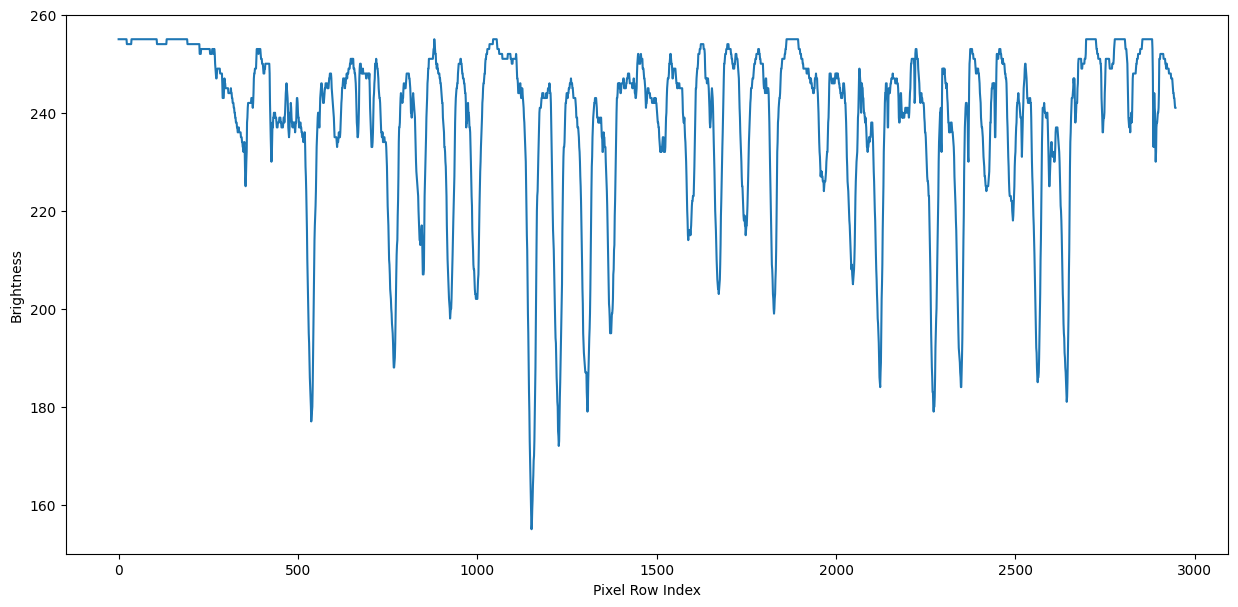

In [71]:
brightness = []

for row in img_arr:
    brightness.append(row[0][0])

plt.figure(figsize=(15, 7))
plt.plot(brightness)
plt.xlabel("Pixel Row Index")
plt.ylabel("Brightness")
plt.show()

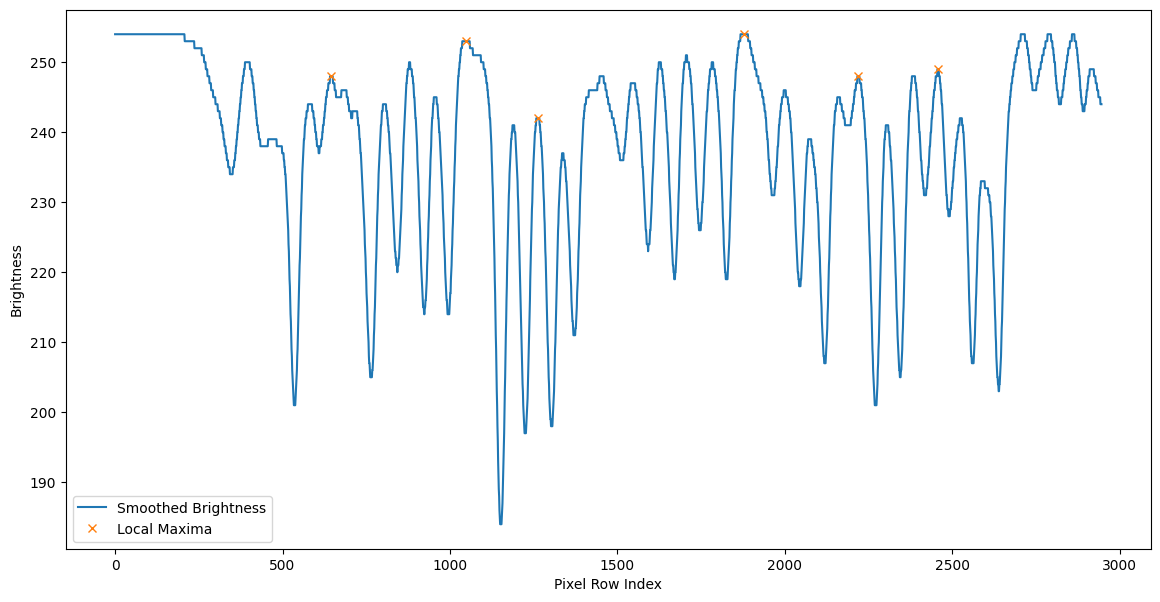

In [72]:
# Original data processing
brightness_np = np.array(brightness)
smoothed_data = gaussian_filter1d(brightness_np, sigma=10)

# More selective peak detection
peaks, _ = find_peaks(smoothed_data, 
    distance=80,          # Minimum distance between peaks
    height=None,         # Minimum height for peak to be considered
    prominence=40,       # Minimum prominence (height relative to neighboring valleys)
    width=None,         # Minimum width of peaks
    threshold=None,      # Minimum height difference with neighboring points
)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(smoothed_data, label="Smoothed Brightness")
plt.plot(peaks, smoothed_data[peaks], "x", label="Local Maxima")
plt.xlabel("Pixel Row Index")
plt.ylabel("Brightness")
plt.legend()
plt.show()

In [73]:
lined_img_arr = original_img_arr.copy()

for i, row in enumerate(img_arr):
    if i in peaks:
        for pixel in row:
            pixel[0] = 255
            pixel[1] = 255
            pixel[2] = 0

for i, row in enumerate(lined_img_arr):
    if i in peaks:
        for pixel in row:
            pixel[0] = 255
            pixel[1] = 255
            pixel[2] = 0
            

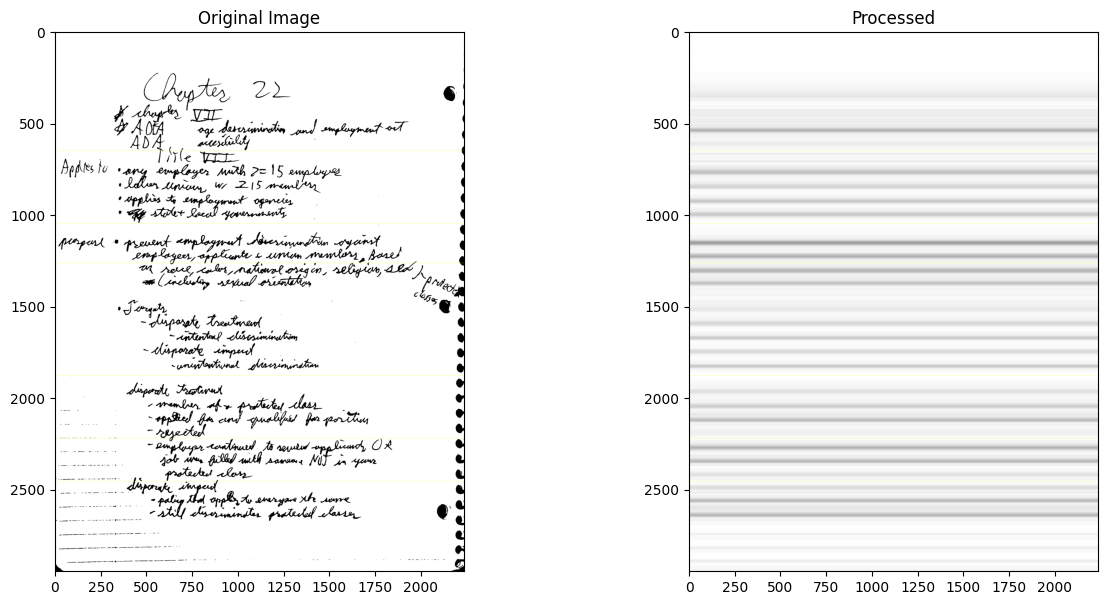

In [74]:
# Convert the processed array back to uint8 for pillow compatibility
formatted_img_arr = np.clip(img_arr, 0, 255).astype(np.uint8)

result_img = Image.fromarray(formatted_img_arr)
tweaked_img = Image.fromarray(lined_img_arr)

plt.figure(figsize=(15, 7))

#Show Images
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.imshow(np.array(tweaked_img))
#plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)  # (rows, columns, index)
plt.imshow(np.array(result_img))
#plt.axis('off')
plt.title("Processed")

plt.show()

In [75]:
split_images = []
mini_image = []

for i, row in enumerate(original_img_arr):
    mini_image.append(row)
    
    # If the image should be split on this row
    if i in peaks:
        split_images.append(np.array(mini_image))  # Convert mini_image to a numpy array before appending
        mini_image = []  # Reset the mini image
#Make sure to add the last one
split_images.append(np.array(mini_image))

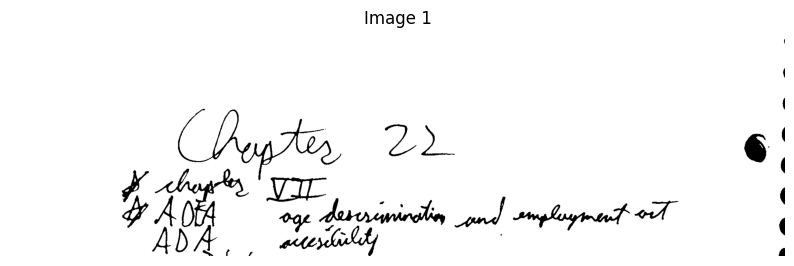

C h _ p t e r [Chapter] 85%

2 2 [22] 96%

$ [Chapter] 70%

V I I [VII] 92%

A D A [ADA] 95%

A D A [ADA] 95%

a g e [age] 88%

d i s _ r i m i n a t i o n [discrimination] 78%

a n d [and] 90%

e m p l o y m e n t [employment] 86%

a c t [act] 91%

a c c _ s s i _ _ l i t y [accessibility] 72%


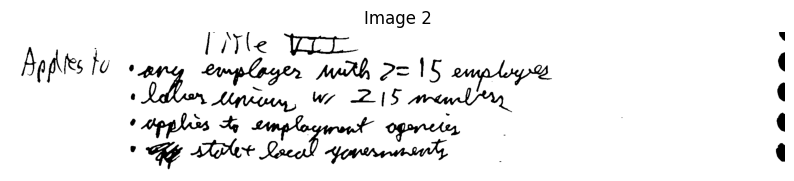

A p p l i e s [Applies] 92%

t o [to] 95%

T I T L E [TITLE] 98%

V I I [VII] 97%

a n y [any] 94%

e m p l o y e r [employer] 89%

w i t h [with] 85%

1 5 [15] 96%

e m p l o y e e s [employees] 87%

l a b o r [labor] 90%

u n i o n [union] 88%

w i t h [with] 85%

2 5 [25] 96%

m e m b e r s [members] 90%

a p p l i e s [applies] 91%

t o [to] 95%

e m p l o y m e n t [employment] 89%

a g e n c i e s [agencies] 88%

a n d [and] 93%

s t a t e [state] 92%

l o c a l [local] 90%

g o v e r n m e n t s [governments] 85%


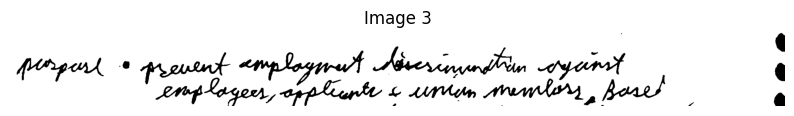

P r o p e r l _ [Properly] 82%
. [.] 96%
P r e v e n t [Prevent] 91%
e m p l o y m e n t [employment] 88%
d i s c r i m i n a t i o n [discrimination] 86%
a g a i n s t [against] 89%
e m p l o y e e s , [employees,] 84%
a p p l i c a n t s [applicants] 90%
o r [or] 95%
u n i o n [union] 92%
m e m b e r s , [members,] 87%


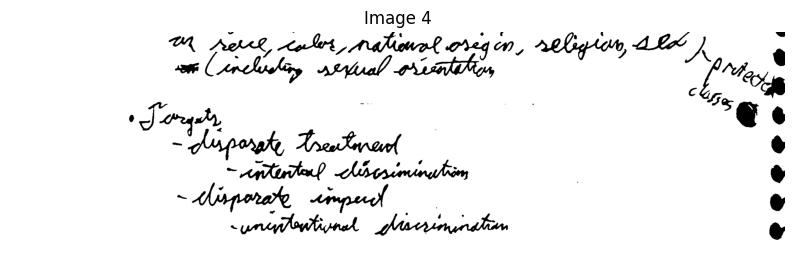

r a c e [race] 95%  
c o l o r [color] 95%  
n a t i o n a l [national] 96%  
o r i g i n [origin] 95%  
r e l i g i o n [religion] 95%  
s e _ [se_] [sex] 80%  
I n c l u d i n g [Including] 92%  
s e x u a l [sexual] 95%  
o r i e n t a t i o n [orientation] 93%  
p r o t e c t e d [protected] 92%  
c l a s s e s [classes] 94%  
T a r g e t s [Targets] 90%  
d i s p a r a t e [disparate] 93%  
t r e a t m e n t [treatment] 94%  
i n t e n t i o n a l [intentional] 90%  
d i s c r i m i n a t i o n [discrimination] 92%  
d i s p a r a t e [disparate] 93%  
i m p a c t [impact] 94%  
u n i n t e n t i o n a l [unintentional] 89%


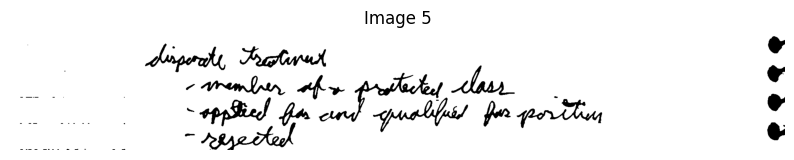

D i s p u t e d [Disputed] 85%  
T r a n s c r i p t [Transcript] 88%  
- [-] 99%  
M e m b e r [Member] 90%  
o f [of] 95%  
a [a] 97%  
p r o t e c t e d [protected] 92%  
c l a s s [class] 94%  
- [-] 99%  
A p p l i e d [Applied] 86%  
f o r [for] 92%  
a n d [and] 95%  
q u a l i f i e d [qualified] 89%  
f o r [for] 93%  
p o s i t i o n [position] 87%  
- [-] 99%  
R e j e c t e d [Rejected] 91%  


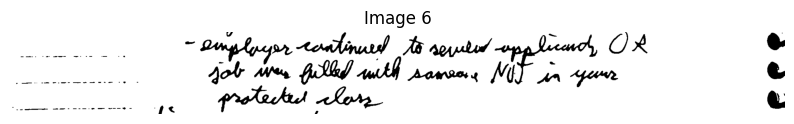

- [-] 95%
e m p l o y e r [employer] 92%
c o n t i n u e _ [continue] 85%
t o [to] 96%
r e _ i e w [review] 80%
a p p l i c a n t s [applicants] 90%
O R [OR] 94%
j o b [job] 93%
w a s [was] 91%
f i l _ e d [filled] 85%
w i t h [with] 92%
s o m e o n e [someone] 88%
N O T [NOT] 97%
i n [in] 95%
y o u r [your] 94%
p r o t e c t e d [protected] 89%
c l a _ s [class] 86%


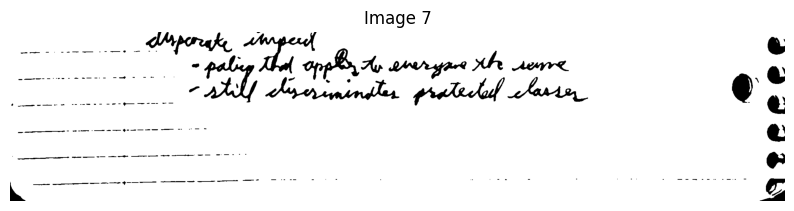

d i s p a r a t e [disparate] 82%

i m p a c t [impact] 85%

p o l i c y [policy] 91%

t h a t [that] 92%

a p p l i e s [applies] 88%

t o [to] 94%

e v e r y o n e [everyone] 87%

t h e [the] 92%

s a m e [same] 90%

s t i l l [still] 94%

d i s c r i m i n a t e s [discriminates] 83%

p r o t e c t e d [protected] 89%

c l a s s e s [classes] 86%


In [76]:
# Directory to save the split images
output_dir = "split_images"

# Clear the directory if it exists
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)  # Remove the directory and all its contents
os.makedirs(output_dir, exist_ok=True)  # Recreate the empty directory

# Convert split images to PIL images and save them
for i, pic in enumerate(split_images):
    # Convert to PIL Image
    converted_img = Image.fromarray(pic)
    
    # Save the image
    image_path = os.path.join(output_dir, f"image_{i+1}.png")
    converted_img.save(image_path)
    
    # Display each image
    plt.figure(figsize=(10, 10))
    plt.imshow(pic)
    plt.axis('off')
    plt.title(f"Image {i+1}")
    plt.show()
    
    gpt.run_chatgpt(image_path)

plt.show()